In [1]:
from fastai import *
from fastai.vision import *

In [2]:
tfms = get_transforms()

In [3]:
path = '/kaggle/input/image-classification-dataset-in-the-gala-event/image_auto_tagging/'
sz = 32
data = ImageDataBunch.from_csv(path, folder = 'Train_Images', csv_labels = "train.csv",test='Test_Images'
                                ,size=224,bs=64,
                               ds_tfms = tfms)
#data.path = pathlib.Path('.')
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (4787 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Food,misc,Attire,Attire,misc
Path: /kaggle/input/image-classification-dataset-in-the-gala-event/image_auto_tagging;

Valid: LabelList (1196 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
misc,Food,misc,Attire,misc
Path: /kaggle/input/image-classification-dataset-in-the-gala-event/image_auto_tagging;

Test: LabelList (3219 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /kaggle/input/image-classification-dataset-in-the-gala-event/image_auto_tagging

In [4]:
data.train_ds

LabelList (4787 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Food,misc,Attire,Attire,misc
Path: /kaggle/input/image-classification-dataset-in-the-gala-event/image_auto_tagging

In [5]:
data.classes

['Attire', 'Decorationandsignage', 'Food', 'misc']

In [6]:
from fastai.metrics import error_rate,accuracy # 1 - accuracy
learn = cnn_learner(data, models.resnet50, metrics=[error_rate,accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.303822,0.815193,0.260870,0.739130,00:54
1,1.084472,0.778454,0.236622,0.763378,00:49
2,0.887925,0.711196,0.226589,0.773411,00:49
3,0.744766,0.650153,0.210702,0.789298,00:49
4,0.640218,0.574153,0.195652,0.804348,00:49
5,0.589615,0.534635,0.188963,0.811037,00:48
6,0.521856,0.541432,0.184783,0.815217,00:48
7,0.487659,0.548557,0.181438,0.818562,00:49
8,0.459384,0.515177,0.177258,0.822742,00:49
9,0.433237,0.519124,0.187291,0.812709,00:49


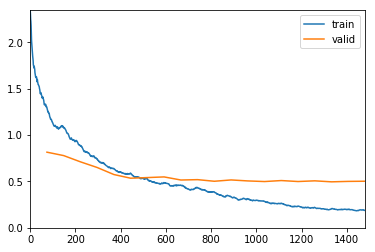

In [7]:

learn.fit_one_cycle(20)

In [8]:
learn.unfreeze() # unfreeze all layers

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.192436,0.511804,0.151338,0.848662,00:48
1,0.189104,0.503383,0.156355,0.843646,00:47
2,0.187853,0.522881,0.153010,0.846990,00:46
3,0.183052,0.549848,0.158027,0.841973,00:46
4,0.180960,0.591503,0.170569,0.829431,00:47
5,0.174488,0.584874,0.158027,0.841973,00:47
6,0.162381,0.592280,0.158027,0.841973,00:46
7,0.155381,0.594876,0.170569,0.829431,00:46
8,0.120224,0.621628,0.163880,0.836120,00:47
9,0.109822,0.665026,0.162207,0.837793,00:46


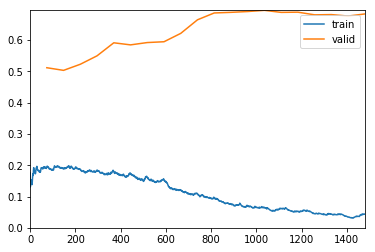

In [9]:
learn.fit_one_cycle(20, slice(1e-6,1e-3))

In [10]:
learn.unfreeze() # unfreeze all layers

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.041511,0.673931,0.152174,0.847826,00:46
1,0.039503,0.677468,0.148829,0.851171,00:45
2,0.039041,0.678728,0.151338,0.848662,00:45
3,0.038016,0.692678,0.153010,0.846990,00:45
4,0.037610,0.677130,0.147993,0.852007,00:45
5,0.037988,0.688933,0.147993,0.852007,00:45
6,0.039988,0.686571,0.144649,0.855351,00:45
7,0.040763,0.689328,0.147993,0.852007,00:45
8,0.046346,0.691355,0.146321,0.853679,00:45
9,0.038331,0.688747,0.149666,0.850334,00:44


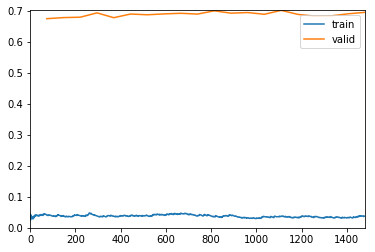

In [11]:
learn.fit_one_cycle(20, slice(1e-7,1e-5))

In [12]:
log_preds, test_labels = learn.get_preds(ds_type=DatasetType.Test)

In [13]:
pred_labes = np.argmax(log_preds, 1)

In [14]:
output = [learn.data.classes[label] for label in pred_labes]

In [15]:
file_names = [str(item).split('/')[6] for item in learn.data.test_ds.items]

In [16]:
df_2 = pd.DataFrame({'Image':file_names,'Class':output}, columns=['Image','Class'])

In [17]:
df_2.head()

,Image,Class
0,image5176.jpg,misc
1,image6549.jpg,Attire
2,image4487.jpg,Decorationandsignage
3,image1948.jpg,Decorationandsignage
4,image5274.jpg,misc


In [18]:
df_2.to_csv('fastai.csv', index=False)